In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error


# Cargar el dataset
from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv("/content/drive/My Drive/MODELOS MONOGRAFIA/otrasinfeccionesMonografia.csv", sep=";")

# Mostrar las primeras filas del dataset para analizar su estructura
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,fecha,semana,tipo,varones,mujeres,total
0,7/1/2019,1,EDA,486,527,1013
1,7/1/2019,1,IRAsinNeumo,1176,1292,2468
2,7/1/2019,1,neumonia,30,36,66
3,14/1/2019,2,EDA,585,627,1212
4,14/1/2019,2,IRAsinNeumo,1789,1963,3752


In [ ]:
# Filtrar los datos para Neumonía en mujeres y preparar el formato
data_ira_mujeres = data[data['tipo'] == 'IRAsinNeumo'][['fecha', 'mujeres']]
data_ira_mujeres['fecha'] = pd.to_datetime(data_ira_mujeres['fecha'], dayfirst=True)
data_ira_mujeres = data_ira_mujeres.sort_values(by='fecha')
data_ira_mujeres.set_index('fecha', inplace=True)

In [ ]:
# Escalar los datos entre 0 y 1
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data_ira_mujeres)

# Crear secuencias de datos
def create_sequences(data, time_steps=1):
    x, y = [], []
    for i in range(len(data) - time_steps):
        x.append(data[i:(i + time_steps), 0])
        y.append(data[i + time_steps, 0])
    return np.array(x), np.array(y)

# Dividir los datos en entrenamiento (80%) y prueba (20%)
train_size = int(len(data_scaled) * 0.85)
train, test = data_scaled[:train_size], data_scaled[train_size:]

# Crear secuencias para entrenamiento y prueba
time_steps = 4
x_train, y_train = create_sequences(train, time_steps)
x_test, y_test = create_sequences(test, time_steps)

# Cambiar la forma de los datos para que sean compatibles con LSTM (samples, time_steps, features)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

model_lstm = Sequential()
model_lstm.add(LSTM(units=100, return_sequences=True, input_shape=(time_steps, 1)))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(units=50))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(1))

---



Epoch 1/60


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1413
Epoch 2/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1013 
Epoch 3/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0741 
Epoch 4/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0351 
Epoch 5/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0210 
Epoch 6/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0287 
Epoch 7/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0291 
Epoch 8/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0216 
Epoch 9/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0207 
Epoch 10/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0215 
Epoch 11/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0215 
Epoch 12/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0179 
Epoch 13/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0179 
Epoch 14/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0204 
Epoch 15/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0173 
Epoch 16/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/st

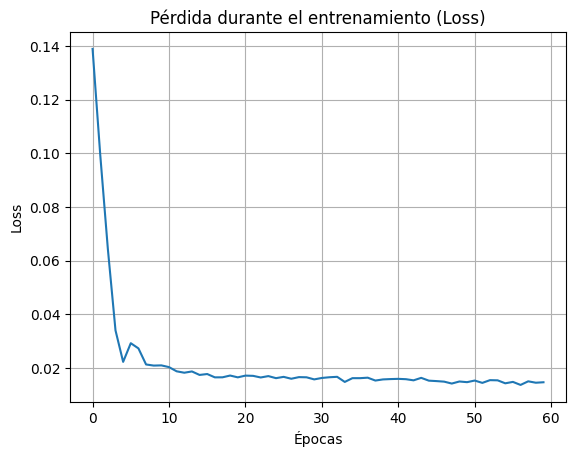

In [ ]:
# Construir el modelo LSTM
#model_lstm = Sequential()
#model_lstm.add(LSTM(units=40, return_sequences=True, input_shape=(time_steps, 1)))
#model_lstm.add(Dropout(0.3))
#model_lstm.add(LSTM(units=15, return_sequences=True))
#model_lstm.add(Dropout(0.2))
#model_lstm.add(LSTM(units=50))
#model_lstm.add(Dense(1))
model_lstm = Sequential()
model_lstm.add(LSTM(units=70, return_sequences=True, input_shape=(time_steps, 1)))
model_lstm.add(Dropout(0.3))
model_lstm.add(LSTM(units=30))
model_lstm.add(Dense(1))

# Compilar el modelo
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
history = model_lstm.fit(x_train, y_train, epochs=60, batch_size=64, verbose=1)

# Graficar la pérdida durante el entrenamiento
plt.plot(history.history['loss'])
plt.title('Pérdida durante el entrenamiento (Loss)')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
MAE: 439.60
RMSE: 554.82
MAPE: 15.36%
sMAPE: 15.90%


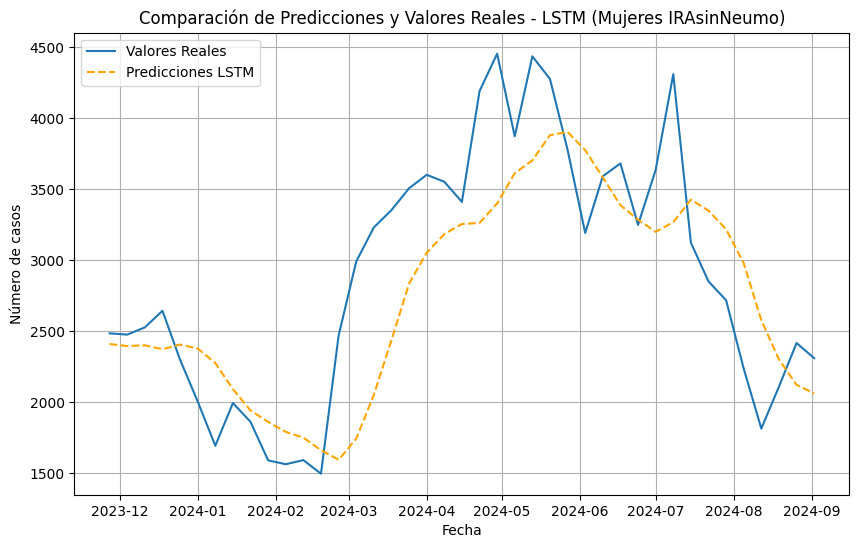

In [ ]:
# Realizar predicciones en el conjunto de prueba
test_predict = model_lstm.predict(x_test)

# Desescalar las predicciones y los valores reales
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

# Calcular métricas de evaluación: MAE, RMSE, MAPE y sMAPE
mae_lstm = mean_absolute_error(y_test[0], test_predict[:, 0])
rmse_lstm = np.sqrt(mean_squared_error(y_test[0], test_predict[:, 0]))
mape_lstm = mean_absolute_percentage_error(y_test[0], test_predict[:, 0]) * 100  # Convertir a porcentaje
smape_lstm = 100 * np.mean(2 * np.abs(y_test[0] - test_predict[:, 0]) / (np.abs(y_test[0]) + np.abs(test_predict[:, 0])))

# Imprimir métricas
print(f'MAE: {mae_lstm:.2f}')
print(f'RMSE: {rmse_lstm:.2f}')
print(f'MAPE: {mape_lstm:.2f}%')
print(f'sMAPE: {smape_lstm:.2f}%')

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(data_ira_mujeres.index[train_size + time_steps:], y_test[0], label='Valores Reales')
plt.plot(data_ira_mujeres.index[train_size + time_steps:], test_predict[:, 0], color='orange', linestyle='--', label='Predicciones LSTM')
plt.title("Comparación de Predicciones y Valores Reales - LSTM (Mujeres IRAsinNeumo)")
plt.xlabel("Fecha")
plt.ylabel("Número de casos")
plt.legend()
plt.grid(True)
plt.show()

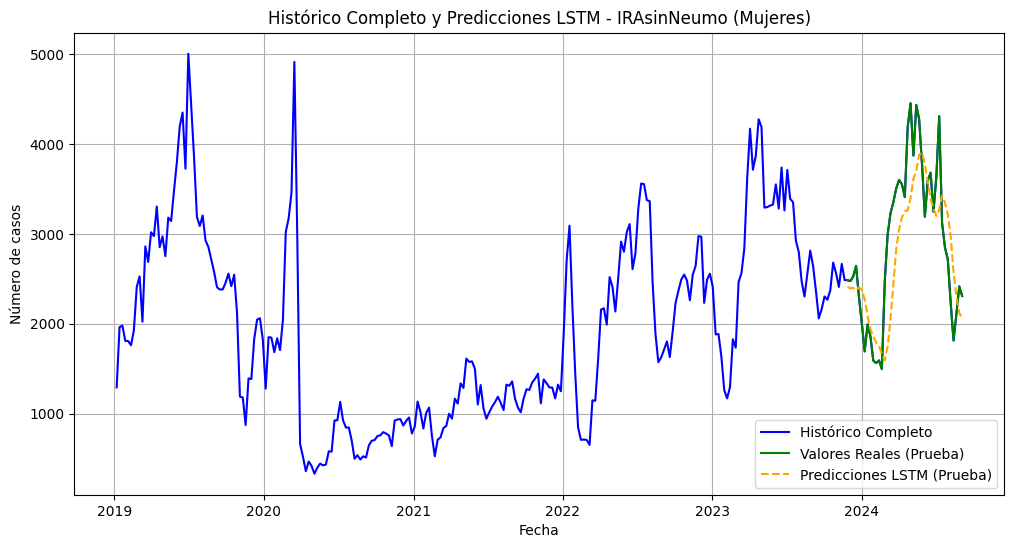

In [ ]:
# Graficar el histórico completo con las predicciones LSTM en el conjunto de prueba
plt.figure(figsize=(12, 6))
plt.plot(data_ira_mujeres.index, scaler.inverse_transform(data_scaled), label="Histórico Completo", color="blue")
plt.plot(data_ira_mujeres.index[train_size + time_steps:], y_test[0], label="Valores Reales (Prueba)", color="green")
plt.plot(data_ira_mujeres.index[train_size + time_steps:], test_predict[:, 0], color='orange', linestyle='--', label="Predicciones LSTM (Prueba)")
plt.title("Histórico Completo y Predicciones LSTM - IRAsinNeumo (Mujeres)")
plt.xlabel("Fecha")
plt.ylabel("Número de casos")
plt.legend()
plt.grid(True)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Predicciones futuras:
Fecha: 2024-09-03, Predicción: 2102.00
Fecha: 2024-09-04, Predicción: 2166.00
Fecha: 2024-09-05, Predicción: 2162.00
Fecha: 2024-09-06, Predicción: 2109.00
Fecha: 2024-09-07, Predicción: 2073.00
Fecha: 2024-09-08, Predicción: 2065.00
Fecha: 2024-09-09, Predicción: 2042.00
Fecha: 2024-09-10, Predicción: 2017.00


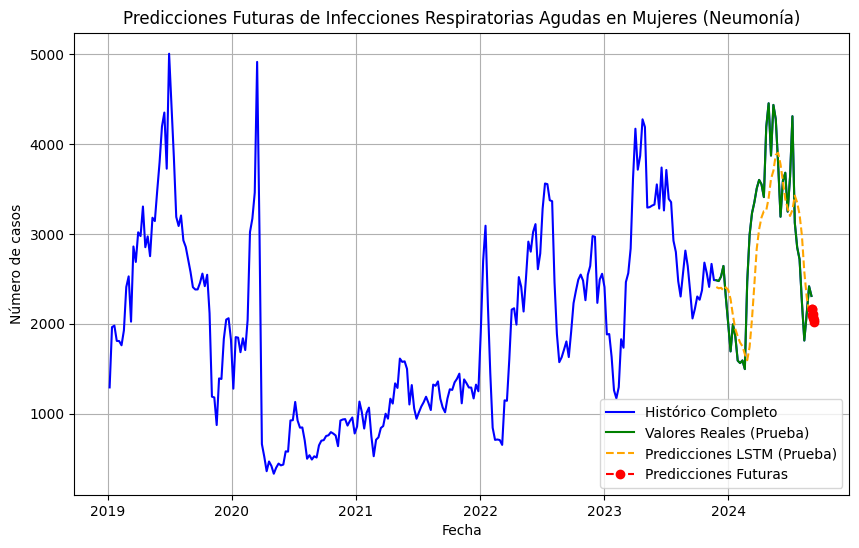

In [ ]:
# prompt: realiza 8 predicciones a futuro

# Preparar los datos para las predicciones futuras
last_data_points = data_scaled[-time_steps:]
future_predictions = []

# Realizar 8 predicciones futuras
for _ in range(8):
    x_input = np.reshape(last_data_points, (1, time_steps, 1))
    prediction = model_lstm.predict(x_input)
    future_predictions.append(prediction[0, 0])
    last_data_points = np.append(last_data_points[1:], prediction)

# Desescalar las predicciones futuras
future_predictions = (scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))).round()

# Crear fechas futuras
last_date = data_ira_mujeres.index[-1]
future_dates = pd.date_range(start=last_date + pd.DateOffset(1), periods=8)

# Imprimir las predicciones futuras
print("Predicciones futuras:")
for i, prediction in enumerate(future_predictions):
    print(f"Fecha: {future_dates[i].strftime('%Y-%m-%d')}, Predicción: {prediction[0]:.2f}")

# Graficar las predicciones futuras
plt.figure(figsize=(10, 6))
plt.plot(data_ira_mujeres.index, scaler.inverse_transform(data_scaled), label="Histórico Completo", color="blue")
plt.plot(data_ira_mujeres.index[train_size + time_steps:], y_test[0], label="Valores Reales (Prueba)", color="green")
plt.plot(data_ira_mujeres.index[train_size + time_steps:], test_predict[:, 0], color='orange', linestyle='--', label="Predicciones LSTM (Prueba)")
plt.plot(future_dates, future_predictions, label="Predicciones Futuras", color="red", linestyle="--", marker="o")
plt.title("Predicciones Futuras de Infecciones Respiratorias Agudas en Mujeres (Neumonía)")
plt.xlabel("Fecha")
plt.ylabel("Número de casos")
plt.legend()
plt.grid(True)
plt.show()

MAE: 207.62
RMSE: 226.93
MAPE: 10.36%
sMAPE: 11.12%


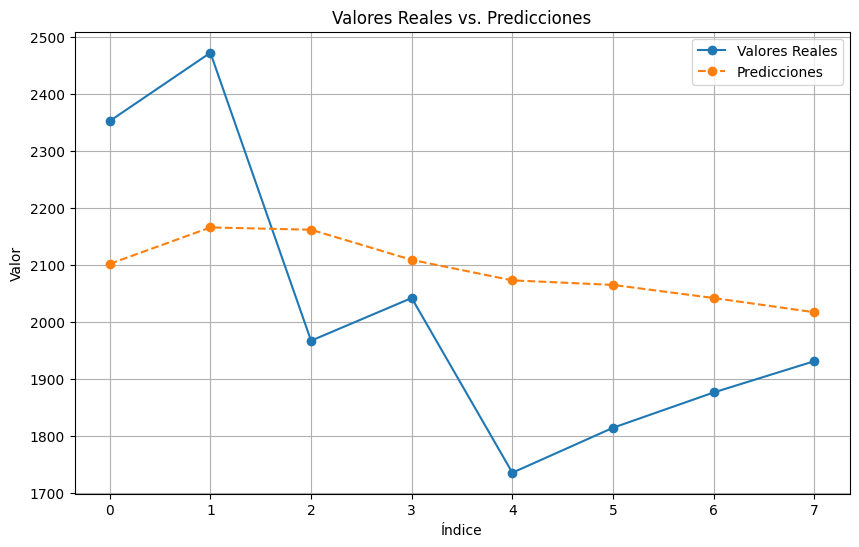

In [ ]:
# Valores reales a futuro
real_values = np.array([2353, 2473, 1967, 2042, 1735, 1814, 1876, 1931])

# Suponiendo que 'future_predictions' contiene las predicciones del modelo
# (ajusta esto con tus predicciones reales)
# Ejemplo de predicciones (reemplaza con tus predicciones)
#future_predictions = np.array([2129, 2239, 2263, 2216, 2198, 2220, 2213, 2200])


# Asegurarse de que las longitudes sean iguales
if len(real_values) != len(future_predictions):
    raise ValueError("Las longitudes de los valores reales y las predicciones deben ser iguales")

# Calcular métricas
mae = mean_absolute_error(real_values, future_predictions)
rmse = np.sqrt(mean_squared_error(real_values, future_predictions))
mape = mean_absolute_percentage_error(real_values, future_predictions) * 100
smape = 100 * np.mean(2 * np.abs(real_values - future_predictions) / (np.abs(real_values) + np.abs(future_predictions)))


print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAPE: {mape:.2f}%')
print(f'sMAPE: {smape:.2f}%')

# Puedes agregar aquí más métricas o visualizaciones si lo deseas.
# Por ejemplo, graficar los valores reales vs. las predicciones
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(real_values, label='Valores Reales', marker='o')
plt.plot(future_predictions, label='Predicciones', linestyle='--', marker='o')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.title('Valores Reales vs. Predicciones')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Asegurarse de que las longitudes sean iguales
if len(real_values) != len(future_predictions):
    raise ValueError("Las longitudes de los valores reales y las predicciones deben ser iguales")

# Crear un DataFrame para la comparación
comparison_df = pd.DataFrame({
    #'Fecha': future_dates,
    'Valores Reales': real_values,
    'Predicciones': future_predictions.flatten()  # Aplanar el array para que coincida con real_values
})

# Mostrar la tabla de comparación
print(comparison_df)


   Valores Reales  Predicciones
0            2353        2102.0
1            2473        2166.0
2            1967        2162.0
3            2042        2109.0
4            1735        2073.0
5            1814        2065.0
6            1876        2042.0
7            1931        2017.0
